Reseach Project "Moral Foundations Twitter Corpus (MFTC)" 


## All the necessary credentials

In [ ]:
# necessary for scrape Twitter
# taken from first semester's DA course (given by lecturer)
# this should not appear in the final code !!

consumer_key = 'tOZWzonsap454dtjS1aHy17Bd'
consumer_secret = 'fRVCa1WpS8lapp9pVQdr82X4UamEsfMLDoobm0kkN9yepg8chz'
access_token_key = '560363551-rDPjiQQ91OW4x8YE5OS8QySkmwus9SM8IBuTNF6J'
access_token_secret = 'bU1cAoGTFIeoRbZkz23eeazy98rWZ5THzM43DsB3cBvms'
# if we have api problem in the future, we can use twint package to scrap the tweets. 
# Reference: https://youtu.be/_SqgSh3aR1g and https://github.com/twintproject/twint 

## MFTC DataSet for Training

In [ ]:
# transfer the MFTC tweets into a data frame
import numpy as np 
import pandas as pd

# access google drive
from google.colab import drive
drive.mount("/content/gdrive")
google_path =  '/content/gdrive/MyDrive/Social Media 2022/'

# could not directly access our shared folder /content/gdrive/My Drive/Social Media 2022/MFTC/MFTC_V4_tweets.json
# had to copy the json file into some other directory of my google drive
#df_train = pd.read_json('/content/gdrive/MyDrive/Social Media 2022/MFTC/MFTC_V4_tweets.json', orient='records')

df_train = pd.read_json('/content/gdrive/MyDrive/Social Media 2022/MFTC/MFTC_V4_text.json', orient='records')


Mounted at /content/gdrive


In [ ]:
filename = google_path + 'df_test_all_cleaned.json'
df_scraped = pd.read_json(filename)

In [ ]:
df_train.describe()

In [ ]:
# display training data

df_train


In [ ]:
# explore the MFTC tweets
print(df_train["Tweets"][1][0])
# here are the annotations, but all, not the final one!
print(df_train["Tweets"][1][0]['annotations'])

{'tweet_id': '593899776564944897', 'tweet_text': "@Amanda_Spruill nice try she's mine 😁", 'annotations': [{'annotator': 'annotator02', 'annotation': 'loyalty,care'}, {'annotator': 'annotator12', 'annotation': 'cheating,betrayal'}, {'annotator': 'annotator13', 'annotation': 'betrayal'}, {'annotator': 'annotator14', 'annotation': 'non-moral'}]}
[{'annotator': 'annotator02', 'annotation': 'loyalty,care'}, {'annotator': 'annotator12', 'annotation': 'cheating,betrayal'}, {'annotator': 'annotator13', 'annotation': 'betrayal'}, {'annotator': 'annotator14', 'annotation': 'non-moral'}]


In [ ]:
def get_individual_corpus_data(df_train, k):
    tweet = []
    annotate = []
    for i in range(len(df_train['Tweets'][k])):
        #getting the tweets 
        tweet.append(df_train["Tweets"][k][i]['tweet_text'])
        #getting the maximum annotations
        a = []
        for j in range(len(df_train["Tweets"][k][i]['annotations'])):
            #getting the individual annotators annotation for each tweet
            ann = df_train["Tweets"][k][i]['annotations'][j]['annotation']
            if ',' in ann:
                a += ann.split(',')
            else:
                a.append(ann)
        #geeting the majority annotation to assign to each tweet
        annotate.append(max(a,key=a.count))

    #Joining the list into a dataframe
    df = pd.DataFrame(list(zip(tweet, annotate)), columns =['tweet', 'annotation'])
    return df

In [ ]:
df_ALM = get_individual_corpus_data(df_train, 0)
df_Baltimore = get_individual_corpus_data(df_train, 1)
df_BLM = get_individual_corpus_data(df_train, 2)
df_Davidson = get_individual_corpus_data(df_train, 3) # didn't have the tweet_text, but has now
df_Election = get_individual_corpus_data(df_train, 4)
df_MeToo = get_individual_corpus_data(df_train, 5)
df_Sandy = get_individual_corpus_data(df_train, 6)

In [ ]:
df_all = pd.concat([df_ALM, df_Baltimore, df_BLM, df_Davidson, df_Election, df_MeToo, df_Sandy])

In [ ]:
df_ALM

In [ ]:
df_all

In [ ]:
df_all_dropped = df_all[df_all['tweet'] != 'no tweet text available']
df_ALM_dropped = df_ALM[df_ALM['tweet'] != 'no tweet text available']
df_Baltimore_dropped = df_Baltimore[df_Baltimore['tweet'] != 'no tweet text available']
df_BLM_dropped = df_BLM[df_BLM['tweet'] != 'no tweet text available']
df_Davidson_dropped = df_Davidson[df_Davidson['tweet'] != 'no tweet text available'] # didn't have the tweet_text, but has now
df_Election_dropped = df_Election[df_Election['tweet'] != 'no tweet text available']
df_MeToo_dropped = df_MeToo[df_MeToo['tweet'] != 'no tweet text available']
df_Sandy_dropped = df_Sandy[df_Sandy['tweet'] != 'no tweet text available']

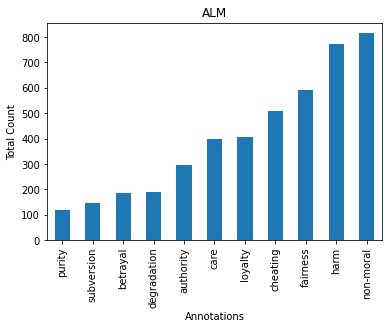

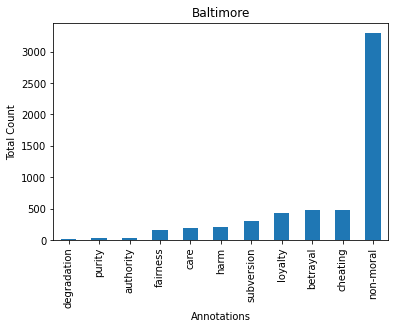

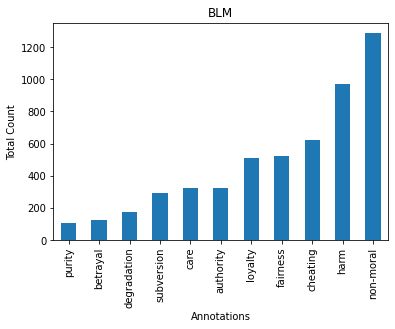

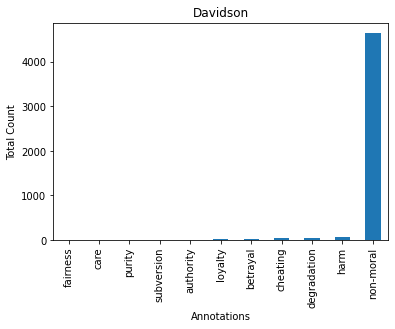

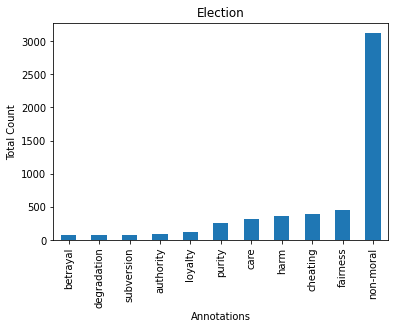

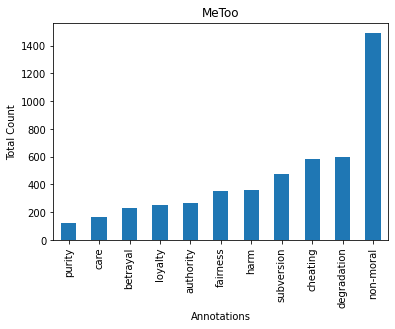

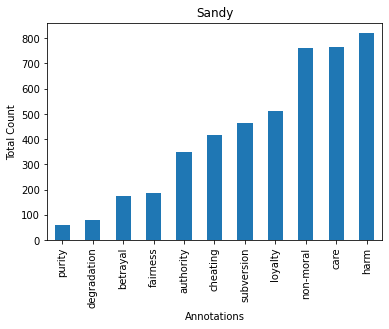

In [ ]:
import matplotlib.pyplot as plt

#df_list = [df_ALM, df_Baltimore, df_BLM, df_Election, df_MeToo, df_Sandy,  df_all_dropped]
df_list = [df_ALM, df_Baltimore, df_BLM, df_Davidson, df_Election, df_MeToo, df_Sandy]

#df_name = ['ALM','Baltimore', 'BLM','Election','MeToo','Sandy','All Together']
df_name = ['ALM','Baltimore', 'BLM', 'Davidson', 'Election','MeToo','Sandy','All Together']

for i in range(len(df_list)):
  filename_distribution = google_path + 'Graphs/image_distribution_' + df_name[i] + '.jpg'
  df_list[i].annotation.value_counts().sort_values().plot(kind = 'bar')
  plt.title(df_name[i])
  plt.xlabel('Annotations')
  plt.ylabel('Total Count')
  plt.savefig(filename_distribution, format='jpg', bbox_inches = 'tight')
  plt.show()
  print(df_list[i].annotation.value_counts().sort_index() )

filename_distribution = google_path + 'Graphs/image_distribution_all' + '.jpg'
df_all.annotation.value_counts().sort_values().plot(kind = 'bar')
plt.title('All')
plt.xlabel('Annotations')
plt.ylabel('Total Count')
plt.savefig(filename_distribution, format='jpg', bbox_inches = 'tight')
plt.show()
print(df_all.annotation.value_counts().sort_index() )


## Tweet Scraping to get the Test Data

In [ ]:
# next try - using tweepy
! pip install tweepy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
''' commented out the scraping part as there is no need to run it every time.

    Scraping the Tweets separately for each of a set of hashtags,
		combine with previous results and remove duplicates,
		then save the resulting data in json-files on g-drive
		filenames: 
		df_test_<hashtag>.json for each <hashtag> (omitting the "#")
		df_test_all.json for all hashtags combined
		(files with "new" in their names are from the last run, they include
		the latest scraped Tweets only)
		All hashtags that are being used are in the variable "hashtags",
		go trough them with
		for ht in hashtags:
			...
		Import resulting data frame for all hashtags: 
  
	  filename = '/content/gdrive/MyDrive/Social Media 2022/df_test_all.json'
    if (exists(filename)): 
	    df_test_all = pd.read_json(filename)
    else:
	    df_test_all = pd.DataFrame()
'''
import tweepy
from tweepy import OAuthHandler
import pandas as pd

from os.path import exists # to check if file exists

# started with obvious hashtags, then expanded by those found in
# scraped tweets 
hashtags = ['antivaccination', 'antivax', 'antivaxination', 'antivaxx', 'antivaxxer', 
					'CovidVaccine', 'freedomofchoice', 'ItsNotAVaccine', 'mybodymychoice',
					'SarsCovVaccine',
					'VaccineDeaths', 'VaccineDisability', 'VaccinesHarm', 
					'VaccineInjured', 'VaccinesKill', 'VaccineSideffects', 
					'vaccinetruth', 'Vaccinesuncovered', 'vaccination', 'vaccinationlies'
					]

''' scraping starts here

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# 
count_of_tweets=2000 # scrape a large amount of tweets
tweets = []
#count = 1

"""Twitter will automatically sample the last 7 days of data. 
Depending on how many total tweets there are with the specific hashtag, keyword, handle, 
or key phrase that you are looking for, you can set the date back further by adding since= 
as one of the parameters. You can also manually add in the number of tweets you want to get
back in the items() section."""

# Import big old test data frame from last run 
# (if it already exists )
filename = '/content/gdrive/MyDrive/Social Media 2022/df_test_all.json'
if (exists(filename)): 
	df_test_all = pd.read_json(filename)
else:
	df_test_all = pd.DataFrame()

# separate scraping for each hashtag:
for ht in hashtags:
	for tweet in tweepy.Cursor(api.search, q='#'+ht, 
                           lang='en',                  
                           tweet_mode='extended', 
													 since='2020-03-01', 
                           result_type='mixed').items(count_of_tweets):

# this if scraping lots of Tweets to see where we are ;) (commented out)	
#	print(count)
#	count += 1

		try: 
#		data = [tweet.created_at, tweet.id, tweet.full_text, tweet.user._json['screen_name'], tweet.user._json['name'], tweet.user._json['created_at'], tweet.entities['urls']]
			data = [tweet.id, tweet.full_text, tweet.created_at, tweet.user._json['screen_name'], tweet.user._json['name'], tweet.user._json['created_at'], tweet.entities['urls']]
			data = tuple(data)
			tweets.append(data)

		except tweepy.TweepError as e:
			print(e.reason)
			continue

		except StopIteration:
			break

# the following transform the scraped tweets into a data frame, saves it in our google drive, 
# reads in the last scraped version,
# then concatenates the scraped tweets to the last saved version in our google drive
# and removes duplicates by same tweet_id
# 
		df_test_new = pd.DataFrame(tweets, columns = ['tweet_id', 'full_text', 'created_at', 'screen_name', 'name', 'account_creation_date', 'urls'])
		df_test_new.sort_values(by=['tweet_id'], axis=0, ascending = True, ignore_index=True, inplace = True)

# Export data frame to json - use temporary file name as duplicates have to be removed
# this was important only for the first batch, now it is interesting only to check that it works ;)
		filename = '/content/gdrive/MyDrive/Social Media 2022/df_test_new_'+ht+'.json'
		df_test_new.to_json(filename)

# Import big old test data frame from last run 
# (if it already exists )
		filename = '/content/gdrive/MyDrive/Social Media 2022/df_test_'+ht+'.json'
		if (exists(filename)): 
			df_test_old = pd.read_json(filename)
		else:
			df_test_old = pd.DataFrame()

# concatenate both (or maybe more if we decide to do it differently)
		frames = [df_test_old, df_test_new]
		df_test = pd.concat(frames, ignore_index=True)

# and remove duplicates by grouping for same tweet_id, taking the first occurance
# and set a new index
		df_test = df_test.groupby('tweet_id').first().reset_index()
# then save as previous version for next run
		filename = '/content/gdrive/MyDrive/Social Media 2022/df_test_'+ht+'.json'
		df_test.to_json(filename)

# hashtag "ht" is finished, so look how many Tweets we got
	print('\n',ht,':')
	print("old:  ", len(df_test_old.index))
	print("new: ", len(df_test_new.index))
	print("combined: ", len(df_test.index))
 
 # concatenate it to the big data frame with all other hashtags
	frames = [df_test_all, df_test_new]
	df_test_all = pd.concat(frames, ignore_index=True)

# and remove duplicates by grouping for same tweet_id, taking the first occurance
# and set a new index
	df_test_all = df_test_all.groupby('tweet_id').first().reset_index()

# then save as previous version for next run
	filename = '/content/gdrive/MyDrive/Social Media 2022/df_test_all.json'
	df_test_all.to_json(filename)

# finally print out how many Tweets we have
print("All hashtags: ", len(df_test_all.index))
'''


## Tweet_text cleaning

In [ ]:
! pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=3efd5da7637cb16df59ca2a2092dd074f2a83172218b53843171158d4bcd899f
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
! pip install emoji~=1.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 32.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=92208cc9f3c4f8bc14885e617f6f7132d15ecff9454babf836735478af1f986b
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
import emoji
import spacy
import stop_words
import re

In [ ]:
nlp = spacy.load('en_core_web_sm')

stopwords = [w.lower() for w in stop_words.get_stop_words('en')]

emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
    )"""

def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

def sanitize(string):
    """ Sanitize one string """

    # remove graphical emoji
    string = give_emoji_free_text(string) 

    # remove textual emoji
    string = re.sub(emoticon_string,'',string)

    # normalize to lowercase 
    string = string.lower()

    # spacy tokenizer 
    string_split = [token.text for token in nlp(string)]

    # in case the string is empty 
    if not string_split:
        return '' 

    # join back to string 
    string = ' '.join(string_split)

    # remove user 
    # assuming user has @ in front
    string = re.sub(r"""(?:@[\w_]+)""",'',string)

    #remove # and @
    for punc in '":!@#':
       string = string.replace(punc, '')

    # remove 't.co/' links
    string = re.sub(r'''(?i)\b((https|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', string, flags=re.MULTILINE)
    # removing stop words 
    string = ' '.join([w for w in string.split() if w not in stopwords])

    return string

In [ ]:
# Tea time: this piece of code will take sometimes 10 or more mins to run-- need to find something that makes it quick -- something needs to be 
# improved in sanitize function (?)
df_ALM['tweet'] = df_ALM['tweet'].apply(sanitize)
df_Baltimore['tweet']=df_Baltimore['tweet'].apply(sanitize)
df_BLM['tweet'] = df_BLM['tweet'].apply(sanitize)
df_Davidson['tweet'] = df_Davidson['tweet'].apply(sanitize)
df_Election['tweet'] = df_Election['tweet'].apply(sanitize)
df_MeToo['tweet'] = df_MeToo['tweet'].apply(sanitize)
df_Sandy['tweet'] = df_Sandy['tweet'].apply(sanitize)
df_all['tweet'] = df_all['tweet'].apply(sanitize)

In [ ]:
#don't run this part
'''
df_ALM.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_ALM.csv', index = False)
df_Baltimore.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_Baltimore.csv', index = False)
df_BLM.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_BLM.csv', index = False)
df_Davidson.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_Davidson.csv', index = False)
df_Election.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_Election.csv', index = False)
df_MeToo.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_MeToo.csv', index = False)
df_Sandy.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_Sandy.csv', index = False)
df_all.to_csv('/content/gdrive/MyDrive/Social Media 2022/Sanitized datasets MFTC'+ '/df_all.csv', index = False)
'''

## Model

In [ ]:
# Refering to table 7 of our research paper: Divide dataframes into moral and non moral categories
annot = ['purity', 'subversion', 'betrayal','degradation', 'authority','care','loyalty','cheating','fairness','harm']

def label_moral(row):
  if row['annotation'] in annot:
    return 0
  elif row['annotation'] == 'non-moral':
    return 1

# Create new column which has two categories of moral and non moral: this way we do not disturb our annotation column and it can be used later for 
# other moral analysis
df_ALM['Moral_nonMoral'] = df_ALM.apply (lambda row: label_moral(row), axis=1)
df_BLM['Moral_nonMoral'] = df_BLM.apply (lambda row: label_moral(row), axis=1)
df_Baltimore['Moral_nonMoral'] = df_Baltimore.apply (lambda row: label_moral(row), axis=1)
df_Davidson['Moral_nonMoral'] = df_Davidson.apply (lambda row: label_moral(row), axis=1)
df_Election['Moral_nonMoral'] = df_Election.apply (lambda row: label_moral(row), axis=1)
df_MeToo['Moral_nonMoral'] = df_MeToo.apply (lambda row: label_moral(row), axis=1)
df_Sandy['Moral_nonMoral'] = df_Sandy.apply (lambda row: label_moral(row), axis=1)
df_all['Moral_nonMoral'] = df_all.apply (lambda row: label_moral(row), axis=1)

In [ ]:
df_ALM

In [ ]:
# code for multiclass

'''df_ALM['Multi_Class'] = df_ALM.groupby('annotation', sort=False).ngroup() + 1
df_BLM['Multi_Class'] = df_BLM.groupby('annotation', sort=False).ngroup() + 1
df_Baltimore['Multi_Class'] = df_Baltimore.groupby('annotation', sort=False).ngroup() + 1
df_Davidson['Multi_Class'] = df_Davidson.groupby('annotation', sort=False).ngroup() + 1
df_Election['Multi_Class'] = df_Election.groupby('annotation', sort=False).ngroup() + 1
df_MeToo['Multi_Class'] = df_MeToo.groupby('annotation', sort=False).ngroup() + 1
df_Sandy['Multi_Class'] = df_Sandy.groupby('annotation', sort=False).ngroup() + 1
df_all['Multi_Class'] = df_all.groupby('annotation', sort=False).ngroup() + 1
'''

In [ ]:
# Balancing the dataset

'''df_grouped_by_ALM = df_ALM.groupby(['annotation'])
df_grouped_by_BLM = df_BLM.groupby(['annotation'])
df_grouped_by_Baltimore = df_Baltimore.groupby(['annotation'])
df_grouped_by_Davidson = df_Davidson.groupby(['annotation'])
df_grouped_by_Election = df_Election.groupby(['annotation'])
df_grouped_by_MeToo = df_MeToo.groupby(['annotation'])
df_grouped_by_Sandy = df_Sandy.groupby(['annotation'])
df_grouped_by_all = df_all.groupby(['annotation'])

df_balanced_ALM = df_grouped_by_ALM.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced_BLM = df_grouped_by_BLM.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced_Baltimore = df_grouped_by_Baltimore.apply(lambda x: x.sample(df_grouped_by.size().min(),replace=True).reset_index(drop=True))
df_balanced_Davidson = df_grouped_by_Davidson.apply(lambda x: x.sample(df_grouped_by.size().min(),replace=True).reset_index(drop=True))
df_balanced_Election = df_grouped_by_Election.apply(lambda x: x.sample(df_grouped_by.size().min(),replace=True).reset_index(drop=True))
df_balanced_MeToo = df_grouped_by_MeToo.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced_Sandy = df_grouped_by_Sandy.apply(lambda x: x.sample(df_grouped_by.size().min(),replace=True).reset_index(drop=True))
df_balanced_all = df_grouped_by_all.apply(lambda x: x.sample(df_grouped_by.size().min(),replace=True).reset_index(drop=True))

df_BLM = df_balanced_BLM.droplevel(['annotation'])
df_ALM = df_balanced_ALM.droplevel(['annotation'])
df_Baltimore = df_balanced_Baltimore.droplevel(['annotation'])
df_Davidson = df_balanced_Davidson.droplevel(['annotation'])
df_Election = df_balanced_Election.droplevel(['annotation'])
df_MeToo = df_balanced_MeToo.droplevel(['annotation'])
df_Sandy = df_balanced_Sandy.droplevel(['annotation'])
df_all = df_balanced_all.droplevel(['annotation'])
'''

**Buiding the LSTM model(s)**

In [ ]:
# libraries to train model(s)
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten, GRU
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
# Tokenizing for all datasets before training LSTM model begins 
top_words = 5000
max_length = 100

data_tokenizer_ALM = Tokenizer(num_words=top_words)
data_tokenizer_BLM = Tokenizer(num_words=top_words)
data_tokenizer_Baltimore = Tokenizer(num_words=top_words)
data_tokenizer_Davidson = Tokenizer(num_words=top_words)
data_tokenizer_Election = Tokenizer(num_words=top_words)
data_tokenizer_MeToo = Tokenizer(num_words=top_words)
data_tokenizer_Sandy = Tokenizer(num_words=top_words)
data_tokenizer_all = Tokenizer(num_words=top_words)


#data_tokenizer_test.fit_on_texts(list(df_test.full_text))
data_tokenizer_ALM.fit_on_texts(list(df_ALM.tweet))
data_tokenizer_BLM.fit_on_texts(list(df_BLM.tweet))
data_tokenizer_Baltimore.fit_on_texts(list(df_Baltimore.tweet))
data_tokenizer_Davidson.fit_on_texts(list(df_Davidson.tweet))
data_tokenizer_Election.fit_on_texts(list(df_Election.tweet))
data_tokenizer_MeToo.fit_on_texts(list(df_MeToo.tweet))
data_tokenizer_Sandy.fit_on_texts(list(df_Sandy.tweet))
data_tokenizer_all.fit_on_texts(list(df_all.tweet))

# The tokens are converted into sequences so that they can be passed to the pad_sequences() function
#test_tokenized_data = data_tokenizer_test.texts_to_sequences(df_test.full_text)
train_td_alm = data_tokenizer_ALM.texts_to_sequences(df_ALM.tweet)
train_td_blm = data_tokenizer_BLM.texts_to_sequences(df_BLM.tweet)
train_td_baltimore = data_tokenizer_Baltimore.texts_to_sequences(df_Baltimore.tweet)
train_td_davidson = data_tokenizer_Davidson.texts_to_sequences(df_Davidson.tweet)
train_td_election = data_tokenizer_Election.texts_to_sequences(df_Election.tweet)
train_td_metoo = data_tokenizer_MeToo.texts_to_sequences(df_MeToo.tweet)
train_td_sandy = data_tokenizer_Sandy.texts_to_sequences(df_Sandy.tweet)
train_td_all = data_tokenizer_all.texts_to_sequences(df_all.tweet)

In [ ]:
# padding

#X_test = pad_sequences(test_tokenized_data, maxlen=max_length)

X_train_alm = pad_sequences(train_td_alm, maxlen=max_length)
X_train_blm = pad_sequences(train_td_blm, maxlen=max_length)
X_train_baltimore = pad_sequences(train_td_baltimore, maxlen=max_length)
X_train_davidson = pad_sequences(train_td_davidson, maxlen=max_length)
X_train_election = pad_sequences(train_td_election, maxlen=max_length)
X_train_metoo = pad_sequences(train_td_metoo, maxlen=max_length)
X_train_sandy = pad_sequences(train_td_sandy, maxlen=max_length)
X_train_all = pad_sequences(train_td_all, maxlen=max_length)

y_train_alm = df_ALM.Moral_nonMoral
y_train_blm = df_BLM.Moral_nonMoral
y_train_baltimore = df_Baltimore.Moral_nonMoral
y_train_davidson = df_Davidson.Moral_nonMoral
y_train_election = df_Election.Moral_nonMoral
y_train_metoo = df_MeToo.Moral_nonMoral
y_train_sandy = df_Sandy.Moral_nonMoral
y_train_all = df_all.Moral_nonMoral


Now, regarding the quantity to monitor: prefer the loss to the accuracy. Why? The loss quantify how certain the model is about a prediction (basically having a value close to 1 in the right class and close to 0 in the other classes). The accuracy merely account for the number of correct predictions. Similarly, any metrics using hard predictions rather than probabilities have the same problem.

Obviously, whatever metrics you end up choosing, it has to be calculated on a validation set and not a training set (otherwise, you are completely missing the point of using EarlyStopping in the first place)

In [ ]:
# callback to stop model training once we achieve accuracy more than 95%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('val_accuracy') > .95:
            print('\n Stopped Training!\n')
            self.model.stop_training = True

# Training model: return model's history
def train_model(model, model_name, epochs_count, batch_size, X_data, y_data, validation_split):    
    cp_path = model_name+"_cp-{epoch:04d}.ckpt"
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=cp_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 mode='max',
                                                 save_best_only=True) # save best model weights
    callbacks_earlystop = myCallback()
    model_history = model.fit(
        X_data,
        y_data,
        steps_per_epoch=batch_size,
        epochs=epochs_count,
        validation_split=validation_split,
        verbose=2,
        callbacks=[cp_callback, callbacks_earlystop]
    ) # records training metrics(accuracy, loss, val_accuracy, val_loss) for each epoch for each model
    return model_history, model

In [ ]:
# code to create graph on obtained accuracy

def create_graph(history):
    plt.plot(history.history['accuracy'], 'b') # accuracy on training data
    plt.plot(history.history['val_accuracy'], 'r') # accuracy on validation data
    plt.title('Model Accuracy Graph'),
    plt.xlabel('Total Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Every LSTM layer should be accompanied by a Dropout layer. This layer will help to prevent overfitting by ignoring randomly selected neurons during training, and hence reduces the sensitivity to the specific weights of individual neurons. 20% is often used as a good compromise between retaining model accuracy and preventing overfitting.


In [ ]:
import itertools
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
class Model_LSTM():
    def __new__(self):
        inp = Input(shape=(max_length, ))
        embed_size = 128
        x = Embedding(top_words, embed_size)(inp)
        x = LSTM(32, return_sequences=True, name='lstm_layer')(x)
        x = GlobalMaxPool1D()(x)
        x = Dense(10, activation="relu")(x)
        x = Dropout(0.2)(x)
        x = Dense(1, activation="sigmoid")(x)
        model = Model(inputs=inp, outputs=x)
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        
        return model

In [ ]:
import itertools
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def Model_LSTM_new(x_train, y_train, validation_split, epoch, batch_size, unit):
  embed_size = 128
  regressor = Sequential()
  regressor.add(Embedding(top_words, embed_size))
  regressor.add(LSTM(units=unit, return_sequences=True))
  regressor.add(GlobalMaxPool1D())
  regressor.add(Dense(10, activation="relu"))
  regressor.add(Dropout(.2))
  regressor.add(Dense(units=1, activation='sigmoid'))
  regressor.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)
  file_path = 'best_model.h5'
  mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
  model = regressor.fit(x_train, y_train, validation_split=validation_split, epochs=epoch, batch_size=batch_size, callbacks=[es, mc], verbose=1)

  return model, regressor

In [ ]:
model_alm = Model_LSTM()

In [ ]:
# for model internal graph
# plot_model(model_alm,show_shapes=True,show_layer_names=True)

In [ ]:
# calculate history of model alm
# The reason for this is that the random initial conditions for an LSTM network can result in very different results each time a given configuration is trained.
#regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)
history_alm, model_lstm_alm = train_model(model_alm, "model_alm", 10, 32, X_train_alm, y_train_alm, 0.3)

In [ ]:
model_history_alm, model_lstm_alm = Model_LSTM_new(X_train_alm, y_train_alm, 0.2, 10, 8, 16)

In [ ]:
pip install tensorflow_hub

In [ ]:
create_graph(model_history_alm)

In [ ]:
model_blm = Model_LSTM()
# calculate history of model a
history_blm, model_lstm_blm = train_model(model_blm, "model_blm", 10, 64, X_train_blm, y_train_blm, 0.2)


In [ ]:
create_graph(history_blm)

In [ ]:
model_baltimore = Model_LSTM()
# calculate history of model baltimore
history_baltimore, model_lstm_baltimore = train_model(model_baltimore, "model_baltimore", 10, 64, X_train_baltimore, y_train_baltimore, 0.2)

In [ ]:
create_graph(history_baltimore)

In [ ]:
model_davidson = Model_LSTM()
# calculate history of model davidson
history_davidson, model_lstm_davidson = train_model(model_davidson, "model_davidson", 10, 64, X_train_davidson, y_train_davidson, 0.2)

In [ ]:
create_graph(history_davidson)

In [ ]:
model_election = Model_LSTM()
# calculate history of model election
history_election, model_lstm_election = train_model(model_election, "model_election", 10, 64, X_train_election, y_train_election, 0.2)

In [ ]:
create_graph(history_election)

In [ ]:
model_metoo = Model_LSTM()
# calculate history of model metoo
history_metoo, model_lstm_metoo = train_model(model_metoo, "model_metoo", 10, 64, X_train_metoo, y_train_metoo, 0.2)

In [ ]:
create_graph(history_metoo)

In [ ]:
model_sandy = Model_LSTM()
# calculate history of model sandy
history_sandy, model_lstm_sandy = train_model(model_sandy, "model_baltimore", 10, 64, X_train_metoo, y_train_metoo, 0.2)

In [ ]:
create_graph(history_sandy)

In [ ]:
model_all = Model_LSTM()
# calculate history of model all
history_all = train_model(model_all, "model_all", 10, 64, X_train_all, y_train_all, 0.2)


**HYPERPARAMETER TUNING**

In [ ]:
import itertools
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

def LSTM_HyperParameter_Tuning(config, x_train, y_train, model):

  '''
  first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
  possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                 n_neurons, n_batch_size, dropout))
  '''

  n_neurons, n_batch_size, dropout = config
  possible_combinations = list(itertools.product(n_neurons, n_batch_size, dropout))
    
  print(possible_combinations)
  print('\n')
    
  hist = []
    
  for i in range(0, len(possible_combinations)):
      
      print(f'{i+1}th combination: \n')
      print('--------------------------------------------------------------------')
      embed_size = 128
      print(possible_combinations[i])
      n_neurons, n_batch_size, dropout = possible_combinations[i]
      
      # instantiating the model in the strategy scope creates the model on the TPU
      #with tpu_strategy.scope():
      regressor = Sequential()
      regressor.add(Embedding(top_words, embed_size))
      regressor.add(LSTM(units=n_neurons, return_sequences=True))
      regressor.add(GlobalMaxPool1D())
      regressor.add(Dropout(dropout))
      
      '''
      # can add as many layer we want
      if first_additional_layer:
          regressor.add(LSTM(units=int(n_neurons/2), return_sequences=True))
          regressor.add(Dropout(dropout))

      if second_additional_layer:
          regressor.add(LSTM(units=n_neurons, return_sequences=True))
          regressor.add(Dropout(dropout))

      if third_additional_layer:
          regressor.add(GRU(units=n_neurons, return_sequences=True))
          regressor.add(Dropout(dropout))
          '''

      regressor.add(Dense(10, activation="relu"))
      regressor.add(Dropout(dropout))
      regressor.add(Dense(units=1, activation='sigmoid'))
      regressor.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

      es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
      '''''
      From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
      alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
      '''''

      file_path = 'best_model.h5'

      mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

      regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

      train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
      print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy}')
        
      print('--------------------------------------------------------------------')
      print('--------------------------------------------------------------------')

      hist.append(list((n_neurons, n_batch_size, dropout,
                          train_accuracy)))
  return hist

In [ ]:
# list of lists --> [[n_neurons], [n_batch_size], [dropout]]
config_1 = [[16, 32], [8, 16, 32], [0.2]]  

In [ ]:
'''
This piece of code if we will use multiple LSTM layers
# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]
config_1 = [[False], [False], [False], [16, 32], [8, 16, 32], [0.2]]  
config_2 = [[True], [False], [False], [16, 32], [8, 16, 32], [0.2]]
config_3 = [[False], [True], [False], [16, 32], [8, 16, 32], [0.2]]
config_4 = [[False], [False], [True], [16, 32], [8, 16, 32], [0.2]] 
config_5 = [[True], [True], [False], [16, 32], [8, 16, 32], [0.2]] 
config_6 = [[False], [True], [True], [16, 32], [8, 16, 32], [0.2]]
config_7 = [[True], [False], [True], [16, 32], [8, 16, 32], [0.2]] 
config_8 = [[True], [True], [True], [16, 32], [8, 16, 32], [0.2]] 
'''

In [ ]:
hist_alm = LSTM_HyperParameter_Tuning(config_1, X_train_alm, y_train_alm, model_alm)

In [ ]:
hist_alm = pd.DataFrame(hist_alm)
hist_alm = hist_alm.sort_values(by=[3], ascending=True)
hist_alm

In [ ]:
print(f'Best Combination: \n n_neurons = {hist_alm.iloc[0, 0]}\n n_batch_size = {hist_alm.iloc[0, 1]}\n dropout = {hist_alm.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_alm.iloc[0, -1], 3)[1]}\n')

In [ ]:
hist_blm = LSTM_HyperParameter_Tuning(config_1, X_train_blm, y_train_blm, model_blm)
hist_blm = pd.DataFrame(hist_blm)
hist_blm = hist_blm.sort_values(by=[3], ascending=True)
hist_blm

[(16, 8, 0.2), (16, 16, 0.2), (16, 32, 0.2), (32, 8, 0.2), (32, 16, 0.2), (32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------
(16, 8, 0.2)

Epoch 1: val_loss improved from inf to 0.10549, saving model to best_model.h5

Epoch 2: val_loss improved from 0.10549 to 0.09608, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.09608

Epoch 4: val_loss did not improve from 0.09608

Epoch 5: val_loss did not improve from 0.09608

Epoch 6: val_loss did not improve from 0.09608

Epoch 7: val_loss did not improve from 0.09608
Epoch 7: early stopping
0-th combination = (16, 8, 0.2) 
 train accuracy: [0.04373907297849655, 0.950542151927948]
--------------------------------------------------------------------
--------------------------------------------------------------------
2th combination: 

--------------------------------------------------------------------
(16, 16, 0.2)

Epoch 1: val_loss improved from inf to 0.15890, sa

,0,1,2,3
3,32,8,0.2,"[0.03847586363554001, 0.9543465971946716]"
2,16,32,0.2,"[0.038908883929252625, 0.9554879069328308]"
5,32,32,0.2,"[0.04080905765295029, 0.9533954858779907]"
4,32,16,0.2,"[0.04178490489721298, 0.9545367956161499]"
0,16,8,0.2,"[0.04373907297849655, 0.950542151927948]"
1,16,16,0.2,"[0.06315206736326218, 0.9271447658538818]"


In [ ]:
print(f'Best Combination: \n n_neurons = {hist_blm.iloc[0, 0]}\n n_batch_size = {hist_blm.iloc[0, 1]}\n dropout = {hist_blm.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_blm.iloc[0, -1], 4)[1]}\n')

Best Combination: 
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
MSE after tuning: 0.9543



In [ ]:
hist_baltimore = LSTM_HyperParameter_Tuning(config_1, X_train_baltimore, y_train_baltimore, model_baltimore)
hist_baltimore = pd.DataFrame(hist_baltimore)
hist_baltimore = hist_baltimore.sort_values(by=[3], ascending=True)
hist_baltimore

[(16, 8, 0.2), (16, 16, 0.2), (16, 32, 0.2), (32, 8, 0.2), (32, 16, 0.2), (32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------
(16, 8, 0.2)

Epoch 1: val_loss improved from inf to 0.13811, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.13811

Epoch 3: val_loss did not improve from 0.13811

Epoch 4: val_loss did not improve from 0.13811

Epoch 5: val_loss did not improve from 0.13811

Epoch 6: val_loss did not improve from 0.13811
Epoch 6: early stopping
0-th combination = (16, 8, 0.2) 
 train accuracy: [0.06980637460947037, 0.9177543520927429]
--------------------------------------------------------------------
--------------------------------------------------------------------
2th combination: 

--------------------------------------------------------------------
(16, 16, 0.2)

Epoch 1: val_loss improved from inf to 0.16470, saving model to best_model.h5

Epoch 2: val_loss improved from 0.16470 to 0.13203, s

,0,1,2,3
3,32,8,0.2,"[0.06575194001197815, 0.9234758019447327]"
5,32,32,0.2,"[0.06799335777759552, 0.919184684753418]"
2,16,32,0.2,"[0.06976044178009033, 0.9179331064224243]"
0,16,8,0.2,"[0.06980637460947037, 0.9177543520927429]"
4,32,16,0.2,"[0.07277748733758926, 0.9134632349014282]"
1,16,16,0.2,"[0.07377412915229797, 0.9152511954307556]"


In [ ]:
print(f'Best Combination: \n n_neurons = {hist_baltimore.iloc[0, 0]}\n n_batch_size = {hist_baltimore.iloc[0, 1]}\n dropout = {hist_baltimore.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_baltimore.iloc[0, -1], 4)[1]}\n')

Best Combination: 
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
MSE after tuning: 0.9235



In [ ]:
hist_davidson = LSTM_HyperParameter_Tuning(config_1, X_train_davidson, y_train_davidson, model_davidson)
hist_davidson = pd.DataFrame(hist_davidson)
hist_davidson = hist_davidson.sort_values(by=[3], ascending=True)
hist_davidson

[(16, 8, 0.2), (16, 16, 0.2), (16, 32, 0.2), (32, 8, 0.2), (32, 16, 0.2), (32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------
(16, 8, 0.2)

Epoch 1: val_loss improved from inf to 0.00643, saving model to best_model.h5

Epoch 2: val_loss improved from 0.00643 to 0.00617, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.00617

Epoch 4: val_loss did not improve from 0.00617

Epoch 5: val_loss did not improve from 0.00617

Epoch 6: val_loss did not improve from 0.00617

Epoch 7: val_loss did not improve from 0.00617
Epoch 7: early stopping
0-th combination = (16, 8, 0.2) 
 train accuracy: [0.02127317152917385, 0.9764005541801453]
--------------------------------------------------------------------
--------------------------------------------------------------------
2th combination: 

--------------------------------------------------------------------
(16, 16, 0.2)

Epoch 1: val_loss improved from inf to 0.00645, s

,0,1,2,3
3,32,8,0.2,"[0.017388176172971725, 0.9809152483940125]"
0,16,8,0.2,"[0.02127317152917385, 0.9764005541801453]"
4,32,16,0.2,"[0.023633403703570366, 0.97516930103302]"
1,16,16,0.2,"[0.02513367123901844, 0.9731171727180481]"
2,16,32,0.2,"[0.025610581040382385, 0.9536219835281372]"
5,32,32,0.2,"[0.04445705562829971, 0.9536219835281372]"


In [ ]:
print(f'Best Combination: \n n_neurons = {hist_davidson.iloc[0, 0]}\n n_batch_size = {hist_davidson.iloc[0, 1]}\n dropout = {hist_davidson.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_davidson.iloc[0, -1], 4)[1]}\n')

Best Combination: 
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
MSE after tuning: 0.9809



In [ ]:
hist_election = LSTM_HyperParameter_Tuning(config_1, X_train_election, y_train_election, model_election)
hist_election = pd.DataFrame(hist_election)
hist_election = hist_election.sort_values(by=[3], ascending=True)
hist_election

[(16, 8, 0.2), (16, 16, 0.2), (16, 32, 0.2), (32, 8, 0.2), (32, 16, 0.2), (32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------
(16, 8, 0.2)

Epoch 1: val_loss improved from inf to 0.24040, saving model to best_model.h5

Epoch 2: val_loss improved from 0.24040 to 0.22315, saving model to best_model.h5

Epoch 3: val_loss improved from 0.22315 to 0.21309, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.21309

Epoch 5: val_loss did not improve from 0.21309

Epoch 6: val_loss did not improve from 0.21309

Epoch 7: val_loss did not improve from 0.21309

Epoch 8: val_loss did not improve from 0.21309
Epoch 8: early stopping
0-th combination = (16, 8, 0.2) 
 train accuracy: [0.10093765705823898, 0.8868981003761292]
--------------------------------------------------------------------
--------------------------------------------------------------------
2th combination: 

--------------------------------------------------

,0,1,2,3
3,32,8,0.2,"[0.09576558321714401, 0.8902575373649597]"
2,16,32,0.2,"[0.09577152132987976, 0.8874580264091492]"
1,16,16,0.2,"[0.09719699621200562, 0.8891377449035645]"
4,32,16,0.2,"[0.1001046746969223, 0.8854050040245056]"
0,16,8,0.2,"[0.10093765705823898, 0.8868981003761292]"
5,32,32,0.2,"[0.10096915811300278, 0.8852183818817139]"


In [ ]:
print(f'Best Combination: \n n_neurons = {hist_election.iloc[0, 0]}\n n_batch_size = {hist_election.iloc[0, 1]}\n dropout = {hist_election.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_election.iloc[0, -1], 4)[1]}\n')

Best Combination: 
 n_neurons = 32
 n_batch_size = 8
 dropout = 0.2
**************************
MSE after tuning: 0.8903



In [ ]:
hist_metoo = LSTM_HyperParameter_Tuning(config_1, X_train_metoo, y_train_metoo, model_metoo)
hist_metoo = pd.DataFrame(hist_metoo)
hist_metoo = hist_metoo.sort_values(by=[3], ascending=True)
hist_metoo

[(16, 8, 0.2), (16, 16, 0.2), (16, 32, 0.2), (32, 8, 0.2), (32, 16, 0.2), (32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------
(16, 8, 0.2)

Epoch 1: val_loss improved from inf to 0.13952, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.13952

Epoch 3: val_loss did not improve from 0.13952

Epoch 4: val_loss did not improve from 0.13952

Epoch 5: val_loss did not improve from 0.13952

Epoch 6: val_loss did not improve from 0.13952
Epoch 6: early stopping
0-th combination = (16, 8, 0.2) 
 train accuracy: [0.07169828563928604, 0.9167859554290771]
--------------------------------------------------------------------
--------------------------------------------------------------------
2th combination: 

--------------------------------------------------------------------
(16, 16, 0.2)

Epoch 1: val_loss improved from inf to 0.15864, saving model to best_model.h5

Epoch 2: val_loss improved from 0.15864 to 0.13994, s

,0,1,2,3
4,32,16,0.2,"[0.06970970332622528, 0.9169903993606567]"
3,32,8,0.2,"[0.07102855294942856, 0.9198527932167053]"
0,16,8,0.2,"[0.07169828563928604, 0.9167859554290771]"
2,16,32,0.2,"[0.07202621549367905, 0.9155591726303101]"
1,16,16,0.2,"[0.0755162388086319, 0.9110611081123352]"
5,32,32,0.2,"[0.07624712586402893, 0.9126967787742615]"


In [ ]:
print(f'Best Combination: \n n_neurons = {hist_metoo.iloc[0, 0]}\n n_batch_size = {hist_metoo.iloc[0, 1]}\n dropout = {hist_metoo.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_metoo.iloc[0, -1], 4)[1]}\n')

Best Combination: 
 n_neurons = 32
 n_batch_size = 16
 dropout = 0.2
**************************
MSE after tuning: 0.917



In [ ]:
hist_sandy = LSTM_HyperParameter_Tuning(config_1, X_train_sandy, y_train_sandy, model_sandy)
hist_sandy = pd.DataFrame(hist_sandy)
hist_sandy = hist_sandy.sort_values(by=[3], ascending=True)
hist_sandy

[(16, 8, 0.2), (16, 16, 0.2), (16, 32, 0.2), (32, 8, 0.2), (32, 16, 0.2), (32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------
(16, 8, 0.2)

Epoch 1: val_loss improved from inf to 0.08303, saving model to best_model.h5

Epoch 2: val_loss improved from 0.08303 to 0.08149, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.08149

Epoch 4: val_loss did not improve from 0.08149

Epoch 5: val_loss did not improve from 0.08149

Epoch 6: val_loss did not improve from 0.08149

Epoch 7: val_loss did not improve from 0.08149
Epoch 7: early stopping
0-th combination = (16, 8, 0.2) 
 train accuracy: [0.04255533590912819, 0.9512088894844055]
--------------------------------------------------------------------
--------------------------------------------------------------------
2th combination: 

--------------------------------------------------------------------
(16, 16, 0.2)

Epoch 1: val_loss improved from inf to 0.09954, s

,0,1,2,3
5,32,32,0.2,"[0.04135708883404732, 0.9507732391357422]"
2,16,32,0.2,"[0.04219365119934082, 0.9516445398330688]"
4,32,16,0.2,"[0.042322393506765366, 0.949466347694397]"
0,16,8,0.2,"[0.04255533590912819, 0.9512088894844055]"
3,32,8,0.2,"[0.042738065123558044, 0.9516445398330688]"
1,16,16,0.2,"[0.045750681310892105, 0.948377251625061]"


In [ ]:
print(f'Best Combination: \n n_neurons = {hist_sandy.iloc[0, 0]}\n n_batch_size = {hist_sandy.iloc[0, 1]}\n dropout = {hist_sandy.iloc[0, 2]}')
print('**************************')
print(f'MSE after tuning: {np.round(hist_sandy.iloc[0, -1], 4)[1]}\n')

Best Combination: 
 n_neurons = 32
 n_batch_size = 32
 dropout = 0.2
**************************
MSE after tuning: 0.9508



In [ ]:
# Too long to run: another tea break maybe?
# Hyperparameter tuning for All corpuses together with configuration 1
hist_all = LSTM_HyperParameter_Tuning(config_1, X_train_all, y_train_all, model_all)

In [ ]:
hist_all = pd.DataFrame(hist_all)
hist_all = hist_all.sort_values(by=[3], ascending=True)
hist_all

some links:

 Twitters api:
 https://developer.twitter.com/en/docs/api-reference-index

 Twitter has a special Covid-19 stream:
 https://developer.twitter.com/en/docs/twitter-api/tweets/covid-19-stream/overview
 (no idea how to access it though)
seem to be a bit outdated maybe
- removing textual emojis: https://stackoverflow.com/a/61758471/42346
- removing graphical emojis: https://stackoverflow.com/a/50602709/42346